In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
data=pd.read_excel(r"C:\Users\haith\Downloads\startup-expansion.xlsx")
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [29]:
data[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


In [30]:
data.duplicated().sum()

np.int64(0)

In [31]:
data['State'].value_counts()
data['City'].value_counts()
#data['City'].uninqe()
#data['City'].nuninqe()


City
Rochester          2
Midland            1
Spokane            1
Denton             1
Peoria             1
                  ..
Paterson           1
Brownsville        1
Rockford           1
College Station    1
Thousand Oaks      1
Name: count, Length: 149, dtype: int64

In [32]:
data['Sales Region' ].value_counts()


Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [33]:
data['New Expansion'].value_counts()

New Expansion
Old    140
New     10
Name: count, dtype: int64

<Axes: xlabel='Sales Region'>

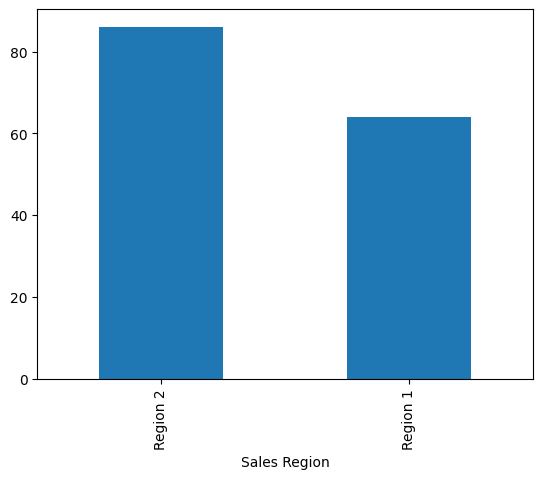

In [34]:
data['Sales Region'].value_counts().plot(kind='bar')

<Axes: xlabel='City'>

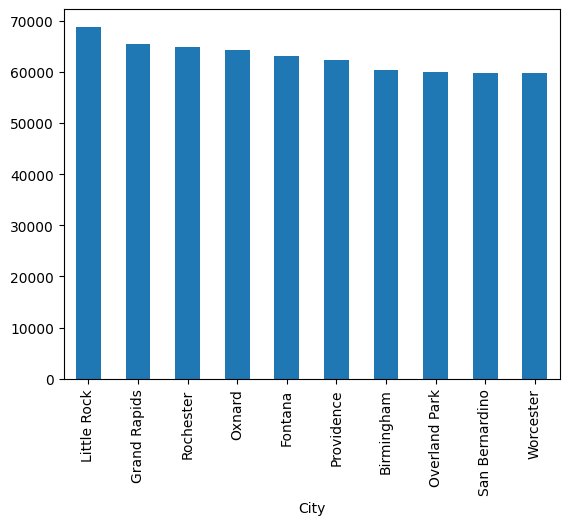

In [35]:
data[data['New Expansion']=='Old'].groupby('City')['Revenue'].max().nlargest(10).plot(kind='bar')

In [66]:
data['profit'] = data['Revenue']-data['Marketing Spend']
data['ROM']=round(data['profit']/data['Marketing Spend'],2)
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit,ROM
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,19.87
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,14.37
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,16.18
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,15.38
148,149,College Station,Texas,Region 2,New,2994,22457,19463,6.50


In [68]:
data.nlargest(10,'ROM')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit,ROM
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388,27.21
37,38,Oxnard,California,Region 2,Old,2318,64302,61984,26.74
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475,62667,22.32
25,26,Port St. Lucie,Florida,Region 1,Old,2420,55790,53370,22.05
8,9,Worcester,Massachusetts,Region 1,Old,2675,59840,57165,21.37
9,10,Rochester,New York,Region 1,Old,2984,64906,61922,20.75
102,103,Visalia,California,Region 2,Old,2104,45632,43528,20.69
50,51,Akron,Ohio,Region 1,Old,2338,50364,48026,20.54
118,119,Huntington Beach,California,Region 2,Old,2527,54145,51618,20.43
144,145,Glendale,California,Region 2,New,2363,49376,47013,19.90


In [82]:
data[data['New Expansion']=='Old'].groupby(['City','State',])['ROM'].sum().nlargest(10)

City              State        
Little Rock       Arkansas         27.21
Oxnard            California       26.74
Grand Rapids      Michigan         22.32
Port St. Lucie    Florida          22.05
Worcester         Massachusetts    21.37
Rochester         New York         20.75
Visalia           California       20.69
Akron             Ohio             20.54
Huntington Beach  California       20.43
Newport News      Virginia         19.89
Name: ROM, dtype: float64

In [84]:
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit,ROM
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,19.87
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,14.37
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,16.18
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,15.38
148,149,College Station,Texas,Region 2,New,2994,22457,19463,6.50


In [85]:
data.to_csv(r"C:\Users\haith\PyFolder\Startup_expantion_modified.csv", index=False)